In [1]:
import torch
import torch.nn as nn

# Tests on pytorch conv2D layers

Its not completely clear how 2D convolution layer transforms dimensions of input data. 

According to https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html :

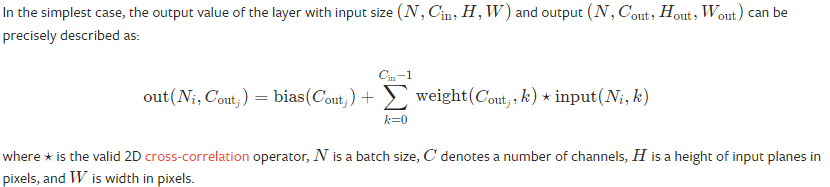

1.  We specify number of kernels by specifying $C_{out}$
1.  $C_{in}$ transforms into $C_{out}$, that means some kind of dimension reduction occurs
1.  We see that this reduction is a summation. 

In fact kernel is not simply $k \times k$ matrix. It is $C_{in} \times k \times k$, such that each channel of input gets unique 'sub-kernel'

If we observe single kernel, it will perform $C_{in}$ convolutions in parallel and then sum-reduce stack $C_{in}$-wise, as is shown on image below

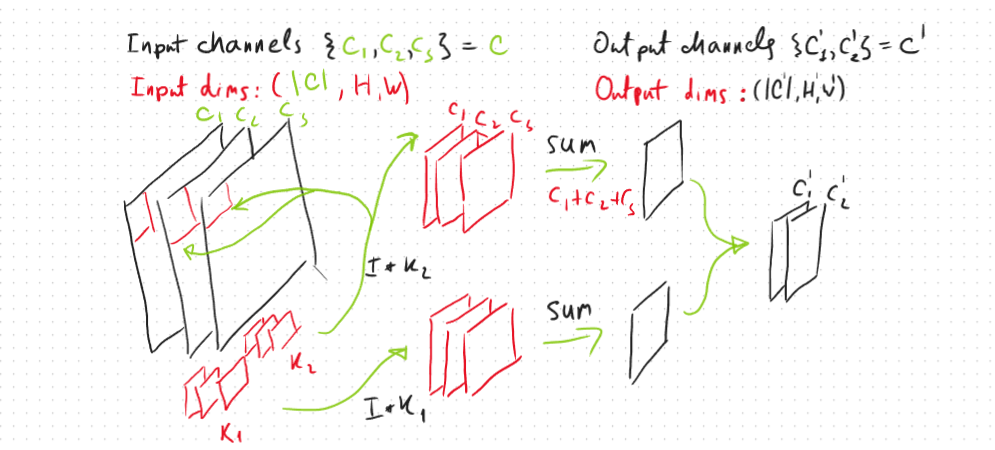

Lets test it by generating an 3 channel image filled with ones. 

Lest set an output of 1 channel = x1 trivial kernel of shape 1x1 (note, it will have layers), also filled with ones.

This kernel is trivial because its like an identity transformation for each input channel (weighted average of one pixel)

But we will observe dimension reduction via sum. 

Result should be np.ones(C,H,W).sum(0)

In [46]:
with torch.no_grad():
    C_in, H, W  = 3,2,2
    C_out       = 1
    inp         = torch.ones(size=(C_in,H,W))
    conv1       = nn.Conv2d(in_channels=C_in, out_channels=1, kernel_size=1, bias=False)
    conv1.weight.data   = torch.ones_like(conv1.weight)
    print(f'{conv1.weight.shape = }')
    print(conv1(inp))

conv1.weight.shape = torch.Size([1, 3, 1, 1])
tensor([[[3., 3.],
         [3., 3.]]])
